# Figure 2

In [1]:
%pylab inline 
from numpy import *

import sys
sys.path.append('../utils')
from network_properties import *
from plot import *

Populating the interactive namespace from numpy and matplotlib


## Figure 2: Initialization of Toy Multilayer Networks

In [2]:
network_names = ['LineStar','SimpleNetwork','RingGraph4','RingGraph6','RingGraph']
# Gs = get_networks_properties(network_names)
Gs = {}
for network_name in network_names:
    Gs[network_name] = get_network_properties(network_name)

## Figure 2: Study $\lambda_2$ vs $\delta$ for different toy networks

In [3]:
# plot the real part of second smallest eigenvalue of supra-Laplacian versus delta for different choices of omega.
def make_fig_lambda2_vs_delta_omegas(Gs,omegas,deltas):
    fig,ax = subplots(1,len(Gs),figsize=(14,2.6),constrained_layout=True)
    for i,network_name in enumerate(Gs):
        G = Gs[network_name]
        Levals = get_evals_across_omegas_deltas(G,omegas,deltas) # eigenvalues of supra-Laplacian
        plot_lambda2_vs_delta_omegas(Levals.real,omegas,deltas,ax[i])
        plot_lambda2_vs_delta_thm(G,deltas,ax[i])
        ax[i].set_xlabel('asymmetry, $\delta$')
    ax[0].set_ylabel('convergence rate, $Re(\lambda_2)$')
    ax[-1].legend(['$\omega = '+str(w)[:5]+'$' for w in omegas],bbox_to_anchor=(1.1, 1.05),fontsize=10)
    fig.text(0.06, 1.05, 'layer dominance',fontsize=14)
    fig.text(0.24, 1.05, 'robust optimum',fontsize=14)
    fig.text(.4, 1.05, 'nonrobust optimum',fontsize=14)
    fig.text(.6, 1.05, 'positive effect',fontsize=14)
    fig.text(.77, 1.05, 'negative effect',fontsize=14)
    return fig,ax


# plot the imaginary part of second smallest eigenvalue of supra-Laplacian versus delta for different choices of omega.
def make_fig_lambda2_vs_delta_omegas_2(Gs,omegas,deltas):
    fig,ax = subplots(1,len(Gs),figsize=(14,2.6),constrained_layout=True)
    for i,network_name in enumerate(Gs):
        G = Gs[network_name]
        Levals = get_evals_across_omegas_deltas(G,omegas,deltas) # eigenvalues of supra-Laplacian
        plot_lambda2_vs_delta_omegas(Levals.imag,omegas,deltas,ax[i])
        ax[i].set_xlabel('asymmetry, $\delta$')
    ax[0].set_ylabel('convergence rate, $Im(\lambda_2)$')
    ax[-1].legend(['$\omega = '+str(w)[:5]+'$' for w in omegas],bbox_to_anchor=(1.1, 1.05),fontsize=10)
    return fig,ax

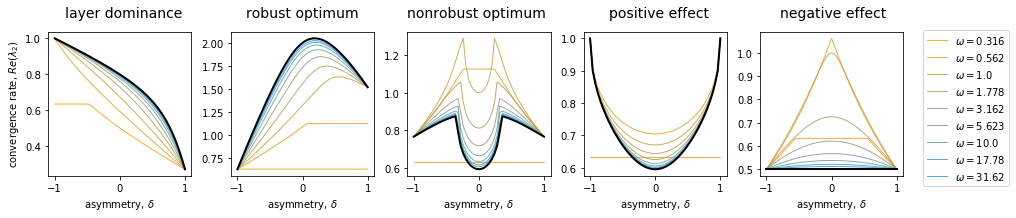

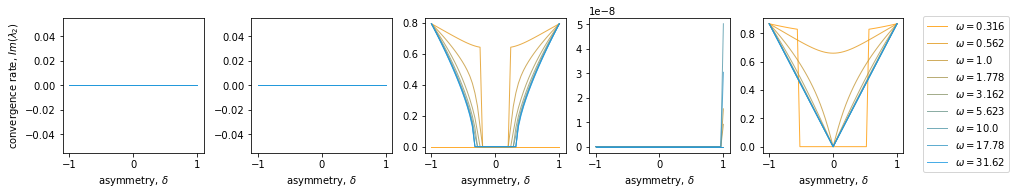

In [4]:
omegas = logspace(-.5,1.5,9) # a bunch of coupling strengths
deltas = linspace(-1,1,51) # a bunch of asymmetry parameters

make_fig_lambda2_vs_delta_omegas(Gs,omegas,deltas)
savefig('figs/figure2B.pdf')

make_fig_lambda2_vs_delta_omegas_2(Gs,omegas,deltas)
savefig('figs/figure2D.pdf')

## Figure 2: Study $\lambda_2$ vs $\omega$ for different toy networks

In [5]:
def make_fig_lambda2_vs_omega_deltas(Gs,omegas,deltas):
    fig,ax = subplots(1,len(Gs),figsize=(14,2.6),constrained_layout=True)
    for i,network_name in enumerate(Gs):
        G = Gs[network_name]
        plot_lambda2_vs_omega_deltas(G,omegas,deltas,ax[i])
        ax[i].set_xlabel('coupling strength, $\omega$')
    ax[0].set_ylabel('convergence rate, $Re(\lambda_2)$')
    ax[-1].legend(['$\delta = '+str(d)+'$' for d in deltas],bbox_to_anchor=(1.1, 1.05),fontsize=10)
    return fig,ax

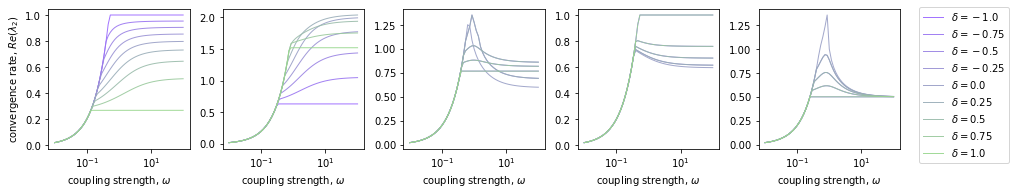

In [6]:
omegas =  logspace(-2,2,61) # a bunch of coupling strengths
deltas = linspace(-1,1,9) # a bunch of asymmetry parameters
make_fig_lambda2_vs_omega_deltas(Gs,omegas,deltas)
savefig('figs/figure2C.pdf')